<a href="https://colab.research.google.com/github/Netoperek5000/colab-cifar10/blob/colab---keras/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  

--2019-05-08 11:54:22--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   137MB/s    in 0.5s    

2019-05-08 11:54:22 (137 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall('/tmp')
zip_.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir( item_dir )
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]


  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
  plt.tight_layout()

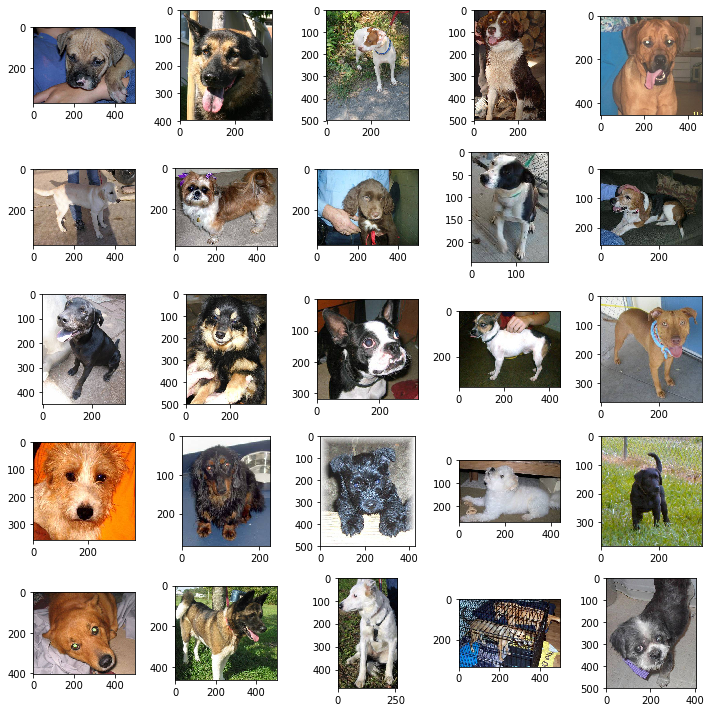

In [41]:
plot_images(train_dogs_dir)

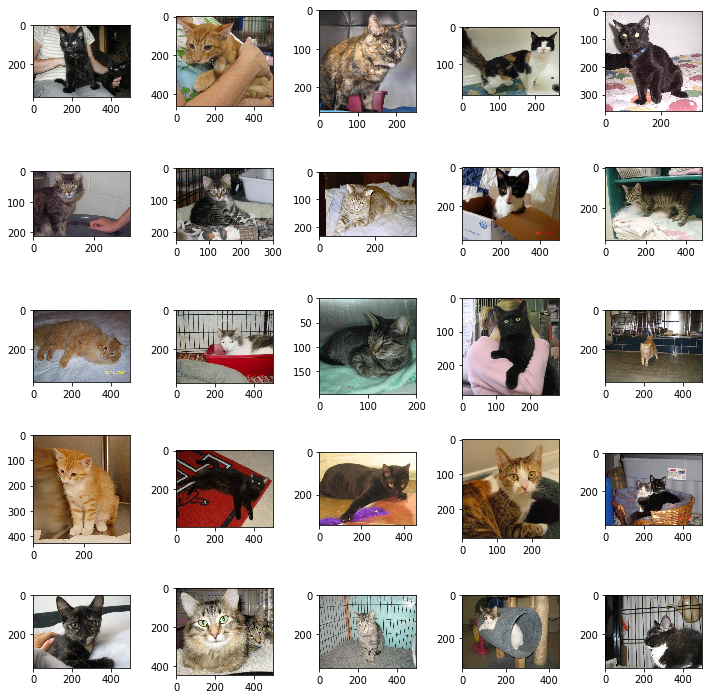

In [42]:
plot_images(train_cats_dir)

In [62]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
    
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)             0         
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [67]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=2)

Epoch 1/5
50/50 [==============================] - 19s 376ms/step - loss: 1.7671 - acc: 0.7070
 - 128s - loss: 0.0213 - acc: 0.9925 - val_loss: 1.7671 - val_acc: 0.7070
Epoch 2/5
50/50 [==============================] - 19s 373ms/step - loss: 1.8549 - acc: 0.6750
 - 128s - loss: 0.0320 - acc: 0.9905 - val_loss: 1.8549 - val_acc: 0.6750
Epoch 3/5
50/50 [==============================] - 19s 378ms/step - loss: 1.8256 - acc: 0.7150
 - 128s - loss: 0.0304 - acc: 0.9920 - val_loss: 1.8256 - val_acc: 0.7150
Epoch 4/5
50/50 [==============================] - 19s 373ms/step - loss: 1.7461 - acc: 0.7140
 - 127s - loss: 0.0174 - acc: 0.9940 - val_loss: 1.7461 - val_acc: 0.7140
Epoch 5/5
50/50 [==============================] - 19s 374ms/step - loss: 1.7915 - acc: 0.7240
 - 127s - loss: 0.0101 - acc: 0.9975 - val_loss: 1.7915 - val_acc: 0.7240
